In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [39]:
labels = ['Benign cases', 'Malignant cases', 'Normal cases']
img_size = 224
data = []
categories = []

# Ganti path ini sesuai lokasi dataset di komputermu
dataset_path = "D:/22.11.5308/SMT 6/Data Mining/Dataset/CT-Scan Lung Cancer"

# Proses setiap gambar
for label in labels:
    folder = os.path.join(dataset_path, label)
    if not os.path.exists(folder):
        print(f"[WARNING] Folder tidak ditemukan: {folder}")
        continue
    for file in os.listdir(folder):
        try:
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            if img is None:
                print(f"[WARNING] Gagal membaca gambar: {img_path}")
                continue
            img = cv2.resize(img, (img_size, img_size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            data.append(img)
            categories.append(labels.index(label))
        except Exception as e:
            print(f"[ERROR] Gagal memproses {img_path}: {e}")
            continue

# Konversi ke array dan normalisasi
X = np.array(data).reshape(-1, img_size, img_size, 1) / 255.0
y = to_categorical(np.array(categories), num_classes=len(labels))

print("Data shape:", X.shape)
print("Label shape:", y.shape)

Data shape: (3609, 224, 224, 1)
Label shape: (3609, 3)


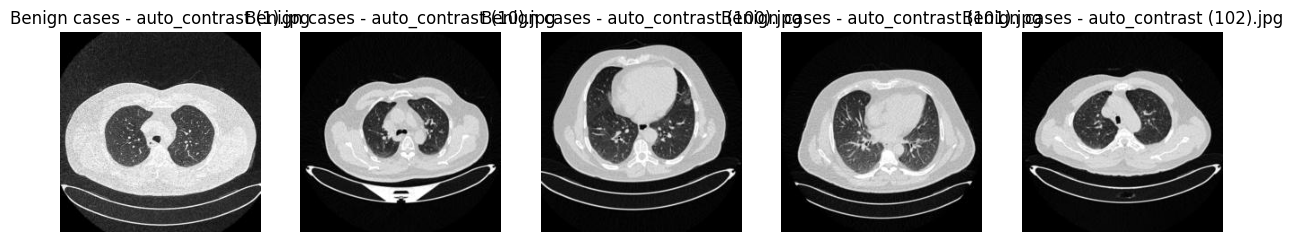

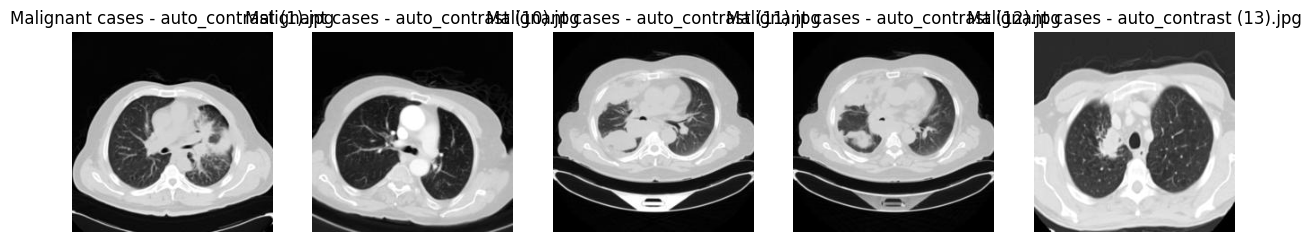

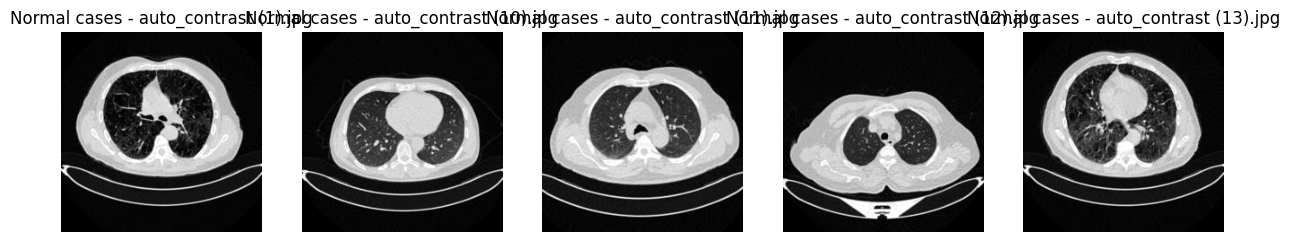

In [40]:
import matplotlib.pyplot as plt
import cv2

# Function to display images
def show_sample_images(class_name, num_samples=5):
    class_path = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg'))][:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"{class_name} - {img_file}")
        axes[i].axis("off")

    plt.show()

# Display samples for each class
for category in ["Benign cases", "Malignant cases", "Normal cases"]:
    show_sample_images(category)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')
])

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
91/91 [==============================] - 80s 857ms/step - loss: 0.9869 - accuracy: 0.6744 - val_loss: 0.2901 - val_accuracy: 0.9017
Epoch 2/15
91/91 [==============================] - 75s 828ms/step - loss: 0.2297 - accuracy: 0.9179 - val_loss: 0.1320 - val_accuracy: 0.9584
Epoch 3/15
91/91 [==============================] - 74s 811ms/step - loss: 0.1200 - accuracy: 0.9591 - val_loss: 0.0971 - val_accuracy: 0.9654
Epoch 4/15
91/91 [==============================] - 76s 834ms/step - loss: 0.0712 - accuracy: 0.9758 - val_loss: 0.0935 - val_accuracy: 0.9695
Epoch 5/15
91/91 [==============================] - 80s 877ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0882 - val_accuracy: 0.9723
Epoch 6/15
91/91 [==============================] - 81s 892ms/step - loss: 0.0412 - accuracy: 0.9882 - val_loss: 0.0966 - val_accuracy: 0.9654
Epoch 7/15
91/91 [==============================] - 81s 891ms/step - loss: 0.0278 - accuracy: 0.9900 - val_loss: 0.0797 - val_accuracy: 0.9737

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy*100:.2f}% | Loss: {loss:.4f}")

23/23 [==============================] - 5s 225ms/step - loss: 0.0956 - accuracy: 0.9737
Akurasi: 97.37% | Loss: 0.0956


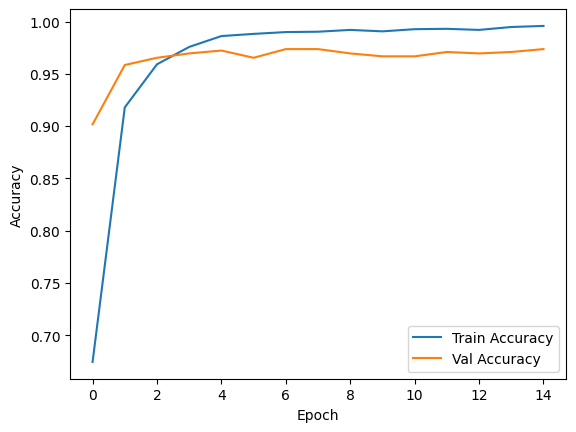

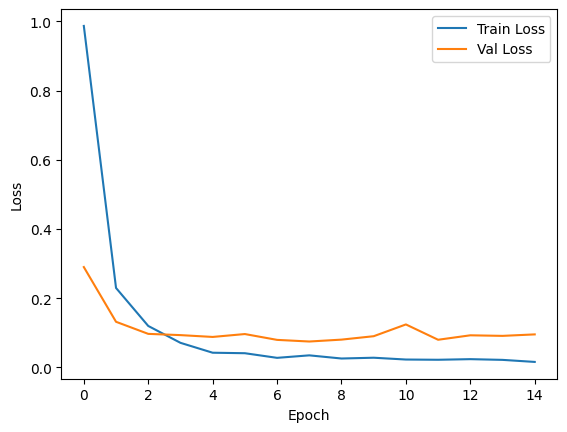

In [46]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

23/23 [==============================] - 5s 223ms/step


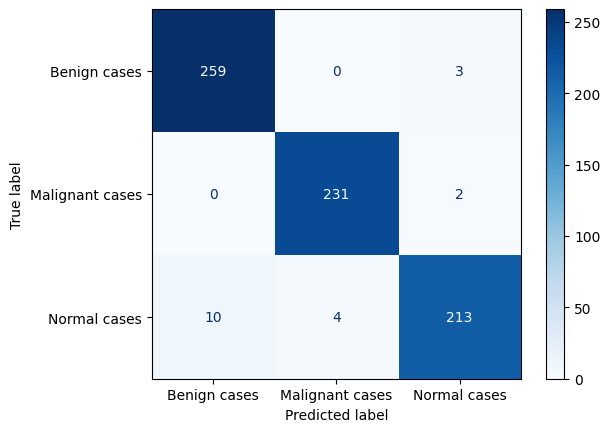

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')

In [48]:
from sklearn.metrics import classification_report
import numpy as np

# Prediksi probabilitas
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Label nama kelas
labels = ['Benign cases', 'Malignant cases', 'Normal cases']

# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


23/23 [==============================] - 5s 228ms/step
Classification Report:
                 precision    recall  f1-score   support

   Benign cases       0.96      0.99      0.98       262
Malignant cases       0.98      0.99      0.99       233
   Normal cases       0.98      0.94      0.96       227

       accuracy                           0.97       722
      macro avg       0.97      0.97      0.97       722
   weighted avg       0.97      0.97      0.97       722



In [49]:
# Convert grayscale (1 channel) to RGB (3 channels)
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)